In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
mean_1=np.array([0.0,0.0])
cov_1=np.array([[1.0,0.1],[0.1,1.1]])
mean_2=np.array([5.0,6.0])
cov_2=np.array([[1.3,0.2],[0.2,1.5]])

dist_1=np.random.multivariate_normal(mean_1,cov_1,500)    # Generates a set of 500 pts. satisfying mean_1 & cov_1 criteria
dist_2=np.random.multivariate_normal(mean_2,cov_2,500)    #Generates a set of 500 pts. satisfying mean_2 & cov_2 criteria

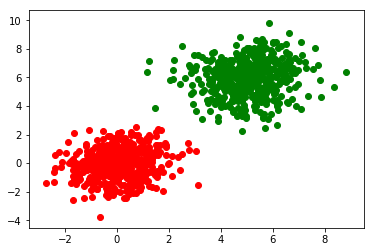

In [5]:
for i in dist_1:
    plt.scatter(i[0],i[1],color='red')
for i in dist_2:
    plt.scatter(i[0],i[1],color='green')

In [6]:
rows=dist_1.shape[0]+dist_2.shape[0]
cols=dist_1.shape[1]+1
data=np.zeros((rows,cols))
print(data.shape)
print(data.dtype)

(1000, 3)
float64


In [7]:
data[:dist_1.shape[0],:-1]=dist_1
data[dist_1.shape[0]:rows , :-1]=dist_2
data[dist_1.shape[0]:rows,-1]=1

In [8]:
np.random.shuffle(data)
data[:10]

array([[ 4.12281035,  6.41616038,  1.        ],
       [-0.99441552, -1.19269196,  0.        ],
       [ 5.336526  ,  3.96838857,  1.        ],
       [ 4.89203623,  3.52210589,  1.        ],
       [ 0.38926141,  0.03948055,  0.        ],
       [ 5.79819687,  7.15418929,  1.        ],
       [-0.50981187, -0.28624605,  0.        ],
       [ 4.61213759,  3.26829311,  1.        ],
       [ 1.51495649, -1.77105505,  0.        ],
       [ 4.89212989,  4.04826769,  1.        ]])

In [9]:
split_factor=0.85
split=int(data.shape[0]*split_factor)
train=data[:split]
test=data[split:]
print(np.shape(train))
print(np.shape(test))

x_train=train[:,:-1]
y_train=train[:,-1]

x_test=test[:,:-1]
y_test=test[:,-1]

print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(850, 3)
(150, 3)
(850, 2)
(850,)
(150, 2)
(150,)


In [10]:
  # Returns the list of repeated elements & theirs counts(number of times of occurance
print(np.unique(y_train,return_counts=True)) 
print(np.unique(y_test,return_counts=True))

(array([ 0.,  1.]), array([430, 420]))
(array([ 0.,  1.]), array([70, 80]))


In [11]:
# Distance Function
def Distance(p1,p2):
    ans=np.sqrt(((p1-p2)**2).sum())
    return ans
# Convert to numpy array as list won't be accepted coz np.sqrt() works only on numpy arrays
print(Distance(np.array([1.0,1.0]),np.array([0.0,0.0])))

1.41421356237


In [12]:
def KNN(test_point,x_train,y_train,k=5):
    d=[]
    for i in range(x_train.shape[0]):
        dist=Distance(test_point,x_train[i])           #For each training sample find distance b/w test & sample pt.
        d.append((dist,y_train[i]))                    # Add it to the list 
    d=np.array(d)                                      # Make it a numpy array
    sorted_val=sorted(d,key=lambda z:z[0])             # Sort it on the basis of distance
    sorted_val=np.array(sorted_val)[:k]                # Slice the nearest k contenders of the neighbours
    freq=np.unique(sorted_val[:,-1],return_counts=True) # It returns 2 list one for unique elements other for their counts
                                                       # So in 2nd list find index of max value using argmax()
    label=freq[0][freq[1].argmax()]                    # then in 1st list look for the same index value to find label of max value
    return label

In [13]:
print(KNN(np.array([3,5]),x_train,y_train))

1.0


In [14]:
def get_acc(x_test, y_test, x_train, y_train, K=5):
    '''This is homework assignment'''
    ##return accuracy
    count=0;
    for i in range(x_test.shape[0]):
        if y_test[i]==KNN(x_test[i],x_train,y_train):
            count+=1
    
    return (count/y_train.shape[0])*100

In [15]:
print(get_acc(x_test,y_test,x_train,y_train))

17.647058823529413


In [16]:
raw_data=pd.read_csv('/home/pawan/Desktop/fashionmnist/fashion-mnist_train.csv')
raw_data.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [17]:
data=np.array(raw_data)
np.shape(data)

(60000, 785)

In [18]:
limit=4000
X=data[:limit,1:]
Y=data[:limit,0]
print(np.shape(X))
print(np.shape(Y))
np.unique(Y)

(4000, 784)
(4000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
split_factor=0.85
split=int(0.85*X.shape[0])
X_train=X[:split,:-1]
Y_train=Y[:split]
X_test=X[split:,:-1]
Y_test=Y[split:]

In [20]:
def predicted(X_test,Y_test,X_train,Y_train,k=5):
    count=0
    for i in range(X_test.shape[0]):
        if Y_test[i]==KNN(X_test[i],X_train,Y_train):
            count+=1
    return (count/len(Y_test))*100

In [21]:
print(predicted(X_test,Y_test,X_train,Y_train))

82.33333333333334
